In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Read the CSV file, skipping the first row (dataset names)
df = pd.read_csv("../../data/UC-UN/UN-data-1.csv", skiprows=1)

# Temperature mapping
temp_map = {
    'green': '700°C',
    'yellow': '800°C', 
    'orange': '900°C',
    'red': '1000°C'
}

# Create datasets dictionary
datasets = {}

# Extract Density datasets (columns 0-7)
colors = ['red', 'orange', 'green', 'yellow']
density_cols = [0, 2, 4, 6]  # X columns for density data
loop_cols = [8, 10, 12, 14]  # X columns for loop-size data

# Extract density data and sort by X values
for i, color in enumerate(colors):
    x_col = density_cols[i]
    y_col = x_col + 1
    
    x_data = pd.to_numeric(df.iloc[:, x_col], errors='coerce').dropna()
    y_data = pd.to_numeric(df.iloc[:, y_col], errors='coerce').dropna()
    min_len = min(len(x_data), len(y_data))
    
    if min_len > 0:
        # Create arrays and sort by X values
        x_vals = x_data.iloc[:min_len].values
        y_vals = y_data.iloc[:min_len].values
        
        # Sort both arrays based on X values
        sorted_indices = np.argsort(x_vals)
        x_sorted = x_vals[sorted_indices]
        y_sorted = y_vals[sorted_indices]
        
        datasets[f'density_{color}'] = {
            'x': x_sorted,
            'y': y_sorted,
            'temp': temp_map[color]
        }

# Extract loop-size data and sort by X values
for i, color in enumerate(colors):
    x_col = loop_cols[i]
    y_col = x_col + 1
    
    x_data = pd.to_numeric(df.iloc[:, x_col], errors='coerce').dropna()
    y_data = pd.to_numeric(df.iloc[:, y_col], errors='coerce').dropna()
    min_len = min(len(x_data), len(y_data))
    
    if min_len > 0:
        # Create arrays and sort by X values
        x_vals = x_data.iloc[:min_len].values
        y_vals = y_data.iloc[:min_len].values
        
        # Sort both arrays based on X values
        sorted_indices = np.argsort(x_vals)
        x_sorted = x_vals[sorted_indices]
        y_sorted = y_vals[sorted_indices]
        
        datasets[f'loop_size_{color}'] = {
            'x': x_sorted,
            'y': y_sorted,
            'temp': temp_map[color]
        }

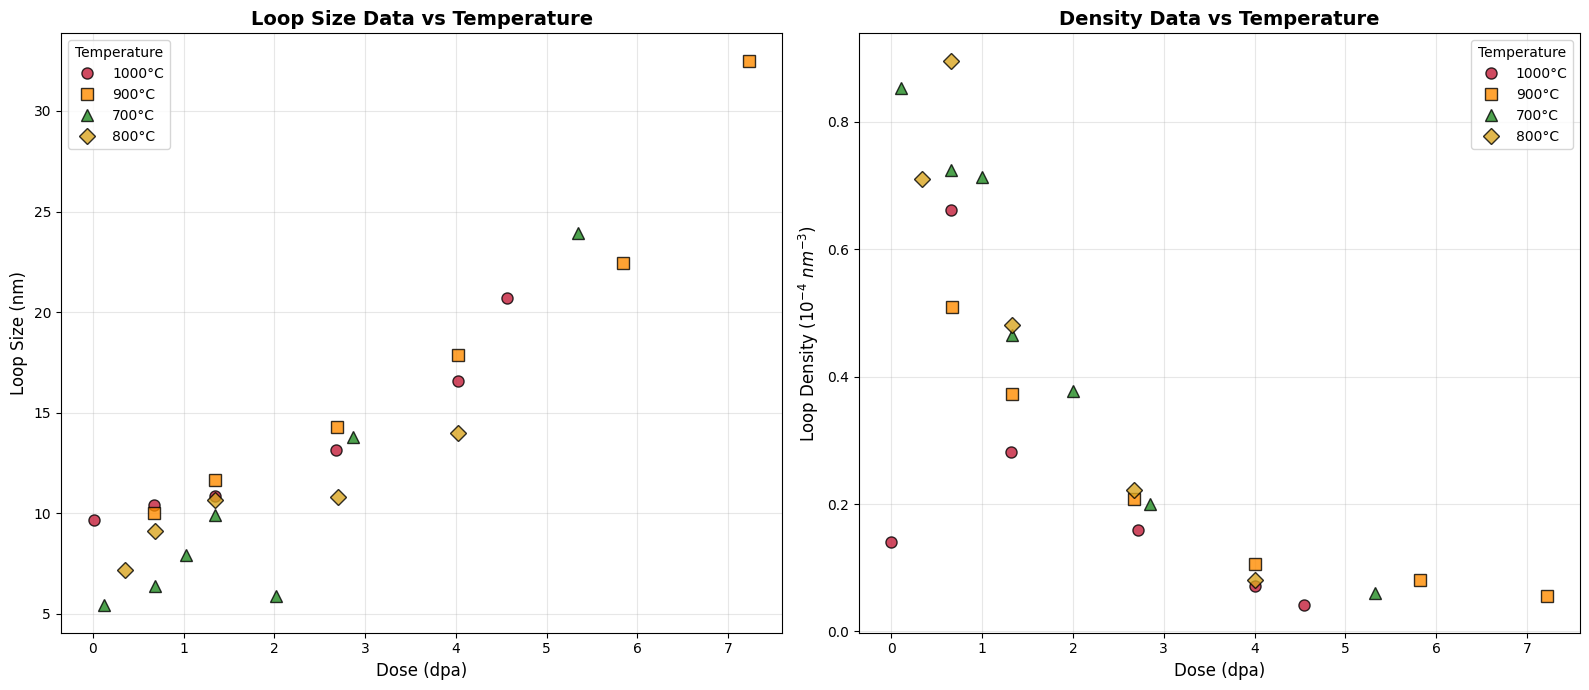

In [28]:
# Create two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 7))

# Plot colors and markers mapping - easier to see colors with distinct markers
plot_colors = {
    'red': '#C41E3A',      # Crimson red
    'orange': '#FF8C00',   # Dark orange
    'green': '#228B22',    # Forest green
    'yellow': '#DAA520'    # Goldenrod
}

# Distinct markers for each temperature
markers = {
    'red': 'o',      # Circle for 1000°C
    'orange': 's',   # Square for 900°C
    'green': '^',    # Triangle up for 700°C
    'yellow': 'D'    # Diamond for 800°C
}

# Plot loop-size data
ax1.set_title('Loop Size Data vs Temperature', fontsize=14, fontweight='bold')
ax1.set_xlabel('Dose (dpa)', fontsize=12)
ax1.set_ylabel('Loop Size (nm)', fontsize=12)

for color in colors:
    key = f'loop_size_{color}'
    if key in datasets:
        data = datasets[key]
        ax1.plot(data['x'], data['y'], marker=markers[color], 
                color=plot_colors[color], linestyle='None',
                label=f'{data["temp"]}', markersize=8, markeredgewidth=1,
                markeredgecolor='black', alpha=0.8)

ax1.legend(title='Temperature', fontsize=10)
ax1.grid(True, alpha=0.3)

# Plot density data
ax2.set_title('Density Data vs Temperature', fontsize=14, fontweight='bold')
ax2.set_xlabel('Dose (dpa)', fontsize=12)
ax2.set_ylabel('Loop Density ($10^{-4}$ $nm^{-3}$)', fontsize=12)

for color in colors:
    key = f'density_{color}'
    if key in datasets:
        data = datasets[key]
        ax2.plot(data['x'], data['y'], marker=markers[color], 
                color=plot_colors[color], linestyle='None',
                label=f'{data["temp"]}', alpha=0.8, linewidth=2, 
                markersize=8, markeredgewidth=1, markeredgecolor='black')

ax2.legend(title='Temperature', fontsize=10)
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()